# **Analyse exploratoire**

➡️ **Introduction:**

Ce notebook a pour objectif: 

- Effectuer une analyse exploratoire des différentes tables

- De nettoyer les valeurs aberrantes et manquantes

- De lier les tables entre elles

- D'effectuer un feature engineering: agrégeant certaines variables, créant de nouvelles variables etc.

- D'analyser la corrélation entre variables afin de sélectionner les variables pertinentes pour le modèle


## **Importation**

In [3]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import gc
from pathlib import Path # Permet de gérer les chemins de façon propre
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import shapiro, normaltest, spearmanr, pearsonr



# Version display
print("Versions utilisées :")
print(f"Python        : {os.sys.version.split()[0]}")
print(f"Numpy         : {np.__version__}")
print(f"Pandas        : {pd.__version__}")
print(f"Matplotlib    : {plt.matplotlib.__version__}")
print(f"Seaborn       : {sns.__version__}")

Versions utilisées :
Python        : 3.10.16
Numpy         : 2.2.5
Pandas        : 2.2.3
Matplotlib    : 3.10.1
Seaborn       : 0.13.2


In [4]:
# Option d'affichage pour voir plus de lignes et colonnes dans les DataFrames
pd.set_option('display.max_rows', None)   
pd.set_option('display.max_columns', 100)     # affiche jusqu'à 100 colonnes
pd.set_option('display.max_colwidth', 100)    # affiche jusqu'à 100 caractères par cellule

In [5]:
# Chemin 
data_dir = Path('C:/Users/alaro/Desktop/Openclassrooms/Projet 7 Modèle de scoring/data')

In [6]:
# Liste des fichiers
filenames = ['application_train.csv',
    'application_test.csv',
    'bureau_balance.csv',
    'bureau.csv',
    'credit_card_balance.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv',
    'sample_submission.csv']

In [7]:
# Dictionnaire pour stocker les DataFrames
dfs = {}

# Chargement automatique
for file in filenames:
    name = file.replace('.csv', '')  # nom de la clé dans le dictionnaire
    dfs[name] = pd.read_csv(data_dir / file)
    print(f"{name} loaded: {dfs[name].shape[0]} rows, {dfs[name].shape[1]} columns")

# Exemple d'accès à une table
app_train = dfs['application_train']
app_train.head()

application_train loaded: 307511 rows, 122 columns
application_test loaded: 48744 rows, 121 columns
bureau_balance loaded: 27299925 rows, 3 columns
bureau loaded: 1716428 rows, 17 columns
credit_card_balance loaded: 3840312 rows, 23 columns
installments_payments loaded: 13605401 rows, 8 columns
POS_CASH_balance loaded: 10001358 rows, 8 columns
previous_application loaded: 1670214 rows, 37 columns
sample_submission loaded: 48744 rows, 2 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [8]:
# Renomme les dfs
app_test = dfs['application_test']
bureau_bal = dfs['bureau_balance']
bureau = dfs['bureau']
credit_card = dfs['credit_card_balance']
inst_pay = dfs['installments_payments']
pos = dfs['POS_CASH_balance']
prev_app = dfs['previous_application']
sample = dfs['sample_submission']

## **Profil de la DF**

In [10]:
print("\n Aperçu des colonnes par table :\n")
for name, df in dfs.items():
    print(f"🔹 {name} ({df.shape[1]} colonnes)")
    print(df.columns.tolist())
    print("-" * 50)


 Aperçu des colonnes par table :

🔹 application_train (122 colonnes)
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'Y

In [11]:
print("\n Types de données par table :\n")
for name, df in dfs.items():
    print(f"🔹 {name} ({df.shape[0]} lignes, {df.shape[1]} colonnes)")
    print(df.dtypes.value_counts())  # résume combien de colonnes de chaque type
    print(df.dtypes.head(10))        # affiche les 10 premières colonnes avec leur type
    print("-" * 50)


 Types de données par table :

🔹 application_train (307511 lignes, 122 colonnes)
float64    65
int64      41
object     16
Name: count, dtype: int64
SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
dtype: object
--------------------------------------------------
🔹 application_test (48744 lignes, 121 colonnes)
float64    65
int64      40
object     16
Name: count, dtype: int64
SK_ID_CURR              int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
AMT_GOODS_PRICE       float64
dtype: object
--------------------------------------------------
🔹 bu

In [12]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Il y a beaucoup plus de prêts remboursés que de prêts avec des défauts de paiement. Poids à intégrer pour la modélisation

In [14]:
# Valeurs uniques
print("\n Nombre de valeurs uniques par colonne :\n")
for name, df in dfs.items():
    print(f"🔹 {name} ({df.shape[1]} colonnes)")
    uniques = df.nunique().sort_values()
    print(uniques)
    print("-" * 50)



 Nombre de valeurs uniques par colonne :

🔹 application_train (122 colonnes)
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_OWN_REALTY                      2
FLAG_OWN_CAR                         2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_EMP_PHONE                       2
FLAG_MOBIL                           2
FLAG_PHONE                           2
FLAG_EMAIL                           2
LIVE_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_WORK_CITY               2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_21                     2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9          

Problème avec CODE_GENDER 
CNT_CHILDREN > 10 ? 
EXT_SOURCE est un score externe utilisé pour estimer la fiabilité du client/ risque crédit : 0 (risqué) et 1 (fiable)

## **Valeurs manquantes**

In [17]:
# Valeurs manquantes
def missing_values_table(df):
    """
    Affiche un tableau des valeurs manquantes pour chaque colonne du DataFrame.

    Paramètres :
    - df : pd.DataFrame - le tableau à analyser

    Retourne :
    - DataFrame trié par pourcentage de valeurs manquantes
    """
    mis_val = df.isnull().sum()  # somme des NaN par colonne
    mis_val_percent = 100 * mis_val / len(df)  # % de valeurs manquantes
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  # combine les deux
    mis_val_table.columns = ['Missing Values', '% of Total Values']  # renomme les colonnes
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]  # filtre les colonnes sans NaN
    return mis_val_table.sort_values('% of Total Values', ascending=False)  # trie par % décroissant

In [18]:
missing_values_table(app_train)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [19]:
missing_values_table(app_test)

,Missing Values,% of Total Values
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [20]:
missing_values_table(bureau_bal)

,Missing Values,% of Total Values


In [21]:
missing_values_table(bureau)

,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


In [22]:
missing_values_table(credit_card)

,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_INST_MIN_REGULARITY,305236,7.948208
CNT_INSTALMENT_MATURE_CUM,305236,7.948208


In [23]:
missing_values_table(inst_pay)

,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352


In [24]:
missing_values_table(pos)

,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675


In [25]:
missing_values_table(prev_app)

,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_LAST_DUE,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129


In [26]:
missing_values_table(sample)

,Missing Values,% of Total Values


Pour les variables catégorielles, on remplace les valeurs manquantes par "Unknown", et pour les variables numériques, on les remplace par la médiane de la colonne.

In [28]:
# Fonction pour traiter les valeurs manquantes
def process_missing_values(df):
    # Remplacement des valeurs manquantes dans les variables catégorielles par 'Unknown'
    cat_cols = df.select_dtypes(include=['object']).columns  # Identifier les colonnes catégorielles
    df[cat_cols] = df[cat_cols].fillna('Unknown')  # Remplacer NaN par 'Unknown' dans les colonnes catégorielles

    # Remplacement des valeurs manquantes dans les variables numériques par la médiane
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Identifier les colonnes numériques
    for col in num_cols:
        median_value = df[col].median()  # Calculer la médiane de la colonne
        df[col] = df[col].fillna(median_value)  # Remplacer NaN par la médiane de la colonne

    return df

# Appliquer la fonction sur le jeu de données
app_train = process_missing_values(app_train)
app_test = process_missing_values(app_test)
bureau = process_missing_values(bureau)
credit_card= process_missing_values(credit_card)
inst_pay= process_missing_values(inst_pay)
pos= process_missing_values(pos)
prev_app= process_missing_values(prev_app)

In [29]:
missing_values_table(app_train)
missing_values_table(app_test)
missing_values_table(bureau)
missing_values_table(credit_card)
missing_values_table(inst_pay)
missing_values_table(pos)
missing_values_table(prev_app)

,Missing Values,% of Total Values


## **Valeurs aberrantes**

Sur app_train et app_test :
- Remplacement de la valeur aberrante 365243 dans DAYS_EMPLOYED par NaN, indiquant un emploi non spécifié.
- Création d'une nouvelle variable booléenne IS_UNEMPLOYED pour identifier ces cas.
- Suppression des 4 lignes où CODE_GENDER == "XNA" (valeur inconnue ou invalide).
- Correction de valeurs incohérentes de CNT_CHILDREN par méthode IQR

Sur previous application: 
- Remplacement des valeurs 365243 par NaN dans les colonnes liées aux dates : DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

Valeurs uniques et leur fréquence :
 CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
9          2
8          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64


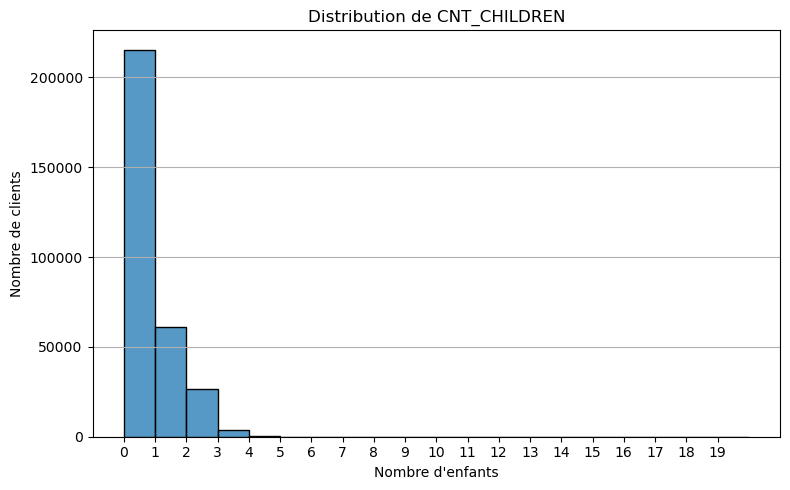

In [32]:
# Affichage de stats de base
print(app_train['CNT_CHILDREN'].describe())
print("\nValeurs uniques et leur fréquence :\n", app_train['CNT_CHILDREN'].value_counts())

# Affichage d'un histogramme
plt.figure(figsize=(8, 5))
sns.histplot(app_train['CNT_CHILDREN'], bins=range(0, int(app_train['CNT_CHILDREN'].max()) + 2), kde=False)
plt.title("Distribution de CNT_CHILDREN")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de clients")
plt.xticks(range(0, int(app_train['CNT_CHILDREN'].max()) + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [33]:
# === Nettoyage pour app_train et app_test ===

def clean_app_data(df):
    
    df = df.copy()
    # Ramener 3 et plus dans la catégorie 3
    df.loc[df['CNT_CHILDREN'] >= 3, 'CNT_CHILDREN'] = 3

    # Crée une variable booléenne is_unemployed
    df['IS_UNEMPLOYED'] = df['DAYS_EMPLOYED'] == 365243

    # Remplace 365243 par NaN
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

    # Supprime les lignes où CODE_GENDER == 'XNA'
    df = df[df['CODE_GENDER'] != 'XNA'].copy() 

    return df

# Application à app_train et app_test
app_train = clean_app_data(app_train)
app_test = clean_app_data(app_test)

# === Nettoyage pour previous_applications ===
def clean_previous_application(prev_app):
    days_cols = [
        'DAYS_FIRST_DRAWING',
        'DAYS_FIRST_DUE',
        'DAYS_LAST_DUE_1ST_VERSION',
        'DAYS_LAST_DUE',
        'DAYS_TERMINATION'
    ]

    for col in days_cols:
        prev_app[col] = prev_app[col].replace(365243, np.nan)

    return prev_app

# Application à previous_applications
prev_app = clean_previous_application(prev_app)


In [34]:
# Affichage de stats de base
print(app_train['CNT_CHILDREN'].describe())
print("\nValeurs uniques et leur fréquence :\n", app_train['CNT_CHILDREN'].value_counts())

count    307507.000000
mean          0.414397
std           0.707103
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: CNT_CHILDREN, dtype: float64

Valeurs uniques et leur fréquence :
 CNT_CHILDREN
0    215369
1     61118
2     26748
3      4272
Name: count, dtype: int64


## **Feature engineering (création de variables)**

### **Aggrégation**

In [41]:
# Fonction pour effectuer des agrégations sur les données de bureau et bureau_balance.

def bureau_and_balance(bureau, bb):
    # Encodage des variables catégorielles de bb (bureau_balance) avec un encodage one-hot.
    bb, _ = one_hot_encoder(bb, nan_as_category=True)
    
    # Agrégation des données de bb par SK_ID_BUREAU : on calcule les min, max et la taille de 'MONTHS_BALANCE'
    bb_agg = bb.groupby('SK_ID_BUREAU').agg({
        'MONTHS_BALANCE': ['min', 'max', 'size']  # Calcul des agrégats de mois de balance
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre plus explicites
    bb_agg.columns = pd.Index(['BB_' + col[0] + '_' + col[1].upper() for col in bb_agg.columns])
    
    # Fusion de l'agrégation bb_agg avec bureau sur la colonne SK_ID_BUREAU
    bureau = bureau.join(bb_agg, on='SK_ID_BUREAU', how='left')
    
    # Suppression des objets bb et bb_agg pour libérer de la mémoire
    del bb, bb_agg
    
    # Lancement du garbage collector pour nettoyer la mémoire
    gc.collect()

    # Encodage des variables catégorielles de bureau avec un encodage one-hot
    bureau, _ = one_hot_encoder(bureau, nan_as_category=True)
    
    # Agrégation des données de bureau par SK_ID_CURR (identifiant client) avec différents calculs
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({
        'DAYS_CREDIT': ['min', 'max', 'mean'],  # Ancienneté des crédits : min, max, et moyenne
        'AMT_CREDIT_SUM': ['mean'],             # Montant moyen total des crédits
        'AMT_CREDIT_SUM_DEBT': ['mean'],        # Montant moyen encore dû
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],     # Montant moyen des sommes en retard
        'CREDIT_DAY_OVERDUE': ['mean'],         # Nombre moyen de jours de retard
        'BB_MONTHS_BALANCE_SIZE': ['mean'],     # Taille moyenne de la balance dans bureau_balance
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre explicites
    bureau_agg.columns = pd.Index(['BURO_' + col[0] + '_' + col[1].upper() for col in bureau_agg.columns])
    
    # Retour de l'agrégation finalisée
    return bureau_agg



In [42]:
# Fonction pour agréger les données des demandes de crédits précédentes.

def previous_applications(prev):
    # Encodage des variables catégorielles de prev avec un encodage one-hot
    prev, _ = one_hot_encoder(prev, nan_as_category=True)
    
    # Calcul du pourcentage du crédit demandé par rapport à ce qui a été accordé
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    
    # Agrégation des données de prev par SK_ID_CURR (identifiant client) avec plusieurs calculs
    prev_agg = prev.groupby('SK_ID_CURR').agg({
        'AMT_CREDIT': ['mean', 'max'],        # Montant moyen et maximum accordé
        'AMT_APPLICATION': ['mean', 'max'],   # Montant moyen et maximum demandé
        'APP_CREDIT_PERC': ['mean'],          # Moyenne du pourcentage de crédit demandé/accordé
        'DAYS_DECISION': ['min'],             # Date de la première demande (min)
        'CNT_PAYMENT': ['mean']               # Nombre moyen de paiements prévus
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre explicites
    prev_agg.columns = pd.Index(['PREV_' + col[0] + '_' + col[1].upper() for col in prev_agg.columns])
    
    # Retour de l'agrégation finalisée
    return prev_agg


In [43]:
# Fonction pour agréger les données des crédits à la consommation (POS ou Cash).

def pos_cash(pos):
    # Encodage des variables catégorielles de pos avec un encodage one-hot
    pos, _ = one_hot_encoder(pos, nan_as_category=True)
    
    # Agrégation des données de pos par SK_ID_CURR avec quelques calculs importants
    pos_agg = pos.groupby('SK_ID_CURR').agg({
        'MONTHS_BALANCE': ['max'],   # Dernière activité (mois de balance)
        'SK_DPD': ['mean'],          # Retards moyens de paiements
        'SK_DPD_DEF': ['mean']       # Retards sérieux moyens
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre explicites
    pos_agg.columns = pd.Index(['POS_' + col[0] + '_' + col[1].upper() for col in pos_agg.columns])
    
    # Retour de l'agrégation finalisée
    return pos_agg


In [44]:
# Fonction pour analyser les comportements de remboursement sur les mensualités des prêts.

def installments_payments(ins):
    # Calcul du pourcentage de paiement effectué par rapport à l'échéance
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    
    # Calcul de la différence entre le montant d'échéance et le paiement effectué
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    
    # Calcul du retard en jours (clampé à 0 pour éviter les valeurs négatives)
    ins['DPD'] = (ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']).clip(lower=0)
    
    # Agrégation des données de remboursement par SK_ID_CURR avec plusieurs calculs
    ins_agg = ins.groupby('SK_ID_CURR').agg({
        'PAYMENT_PERC': ['mean'],  # Moyenne du pourcentage payé par rapport à l’échéance
        'PAYMENT_DIFF': ['mean', 'max'],  # Différence moyenne et max entre paiement effectué et dû
        'DPD': ['mean', 'max']            # Retard moyen et maximum de paiement
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre explicites
    ins_agg.columns = pd.Index(['INSTAL_' + col[0] + '_' + col[1].upper() for col in ins_agg.columns])
    
    # Retour de l'agrégation finalisée
    return ins_agg


In [45]:
# Fonction pour analyser les comportements des clients sur leurs cartes de crédit.

def credit_card_balance(cc):
    # Encodage des variables catégorielles de cc avec un encodage one-hot
    cc, _ = one_hot_encoder(cc, nan_as_category=True)
    
    # Suppression de la colonne SK_ID_PREV, qui n'est pas nécessaire dans ce contexte
    cc.drop(['SK_ID_PREV'], axis=1, inplace=True)
    
    # Agrégation des données de crédit par SK_ID_CURR avec quelques statistiques
    cc_agg = cc.groupby('SK_ID_CURR').agg({
        'AMT_BALANCE': ['mean', 'max', 'min'],            # Solde moyen, maximum et minimum
        'AMT_PAYMENT_TOTAL_CURRENT': ['mean', 'max', 'min'], # Paiement total moyen, maximum et minimum
        'SK_DPD': ['mean', 'max'],                        # Jours de retard moyens et max
    })
    
    # Modification des noms de colonnes après agrégation pour les rendre explicites
    cc_agg.columns = pd.Index(['CC_' + col[0] + '_' + col[1].upper() for col in cc_agg.columns])
    
    # Retour de l'agrégation finalisée
    return cc_agg


In [46]:
def one_hot_encoder(df, nan_as_category=True):
    """
    Encode les colonnes catégorielles du DataFrame en one-hot encoding.
    
    Args:
        df (pd.DataFrame): Le DataFrame à encoder.
        nan_as_category (bool): Si True, les valeurs manquantes seront traitées comme une catégorie distincte.

    Returns:
        df (pd.DataFrame): Le DataFrame avec les colonnes one-hot encodées.
        original_columns (list): La liste des colonnes qui ont été encodées.
    """

    # Sélectionne les colonnes de type 'object' ou 'category' (variables catégorielles)
    original_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Effectue le one-hot encoding sur ces colonnes
    # drop_first=False garde toutes les catégories
    # dummy_na=nan_as_category permet d'inclure les NaN comme une catégorie à part si True
    df = pd.get_dummies(df, columns=original_columns, dummy_na=nan_as_category, drop_first=False)

    # Retourne le DataFrame modifié et la liste des colonnes encodées
    return df, original_columns


In [47]:
# Création des tables agrégées
bureau_agg = bureau_and_balance(bureau, bureau_bal)
prev_agg = previous_applications(prev_app)
pos_agg = pos_cash(pos)
installments_agg = installments_payments(inst_pay)
cc_agg = credit_card_balance(credit_card)

In [48]:
# Assurer que SK_ID_CURR est bien dans les index
app_train = app_train.set_index('SK_ID_CURR')
app_test = app_test.set_index('SK_ID_CURR')

# Fusion des agrégations
for agg_df in [bureau_agg, prev_agg, pos_agg, installments_agg, cc_agg]:
    app_train = app_train.join(agg_df, how='left')
    app_test = app_test.join(agg_df, how='left')

# Rétablir SK_ID_CURR en colonne
app_train.reset_index(inplace=True)
app_test.reset_index(inplace=True)

# Vérification
print('app_train shape:', app_train.shape)
print('app_test shape:', app_test.shape) 


app_train shape: (307507, 154)
app_test shape: (48744, 153)


- bureau_agg => bureau + bureau_balance	=> Infos sur les crédits externes gérés par d'autres banques
- prev_agg => previous_application => Infos sur les anciennes demandes de crédit
- ins_agg => installments_payments => Paiements mensuels des anciens crédits
- pos_agg => POS_CASH_balance => Encours des crédits POS ou crédits à la consommation
- cc_agg => credit_card_balance => Infos sur les cartes de crédit

### **Création de nouvelle variable**

In [51]:
# 1. Rapport entre jours d'emploi et âge en jours
# Donne une idée de la proportion de vie professionnelle par rapport à l'âge
app_train['DAYS_EMPLOYED_PERC'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_test['DAYS_EMPLOYED_PERC'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

# 2. Rapport entre revenu annuel et crédit demandé
# Mesure la capacité de remboursement d'un client via ses revenus
app_train['INCOME_CREDIT_PERC'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']
app_test['INCOME_CREDIT_PERC'] = app_test['AMT_INCOME_TOTAL'] / app_test['AMT_CREDIT']

# 3. Revenu par membre du foyer
# Estime le niveau de vie individuel d’un client en fonction du revenu familial
app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_test['INCOME_PER_PERSON'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_FAM_MEMBERS']

# 4. Rapport entre l’annuité et le revenu total
# Indique le poids des mensualités par rapport au revenu
app_train['ANNUITY_INCOME_PERC'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERC'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']

# 5. Taux de remboursement (annuité sur crédit total)
# Évalue la rapidité à laquelle un client rembourse son crédit
app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_test['PAYMENT_RATE'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']

# 6. Durée de remboursement du crédit (en années)
# Approche la durée estimée de remboursement du crédit
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / (app_train['AMT_CREDIT'] )
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / (app_test['AMT_CREDIT'])

# 7. Âge de l'emprunteur
# Utilisation de DAYS_BIRTH, qui contient l’âge en jours négatifs
app_train['AGE'] = (-app_train['DAYS_BIRTH']) // 365
app_test['AGE'] = (-app_test['DAYS_BIRTH']) // 365

In [52]:
display(app_train.shape)
display(app_test.shape)
display (app_train.head())

(307507, 161)

(48744, 160)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,IS_UNEMPLOYED,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_AMT_CREDIT_SUM_MEAN,BURO_AMT_CREDIT_SUM_DEBT_MEAN,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,BURO_CREDIT_DAY_OVERDUE_MEAN,BURO_BB_MONTHS_BALANCE_SIZE_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_APP_CREDIT_PERC_MEAN,PREV_DAYS_DECISION_MIN,PREV_CNT_PAYMENT_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MEAN,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MIN,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_MAX,CC_AMT_PAYMENT_TOTAL_CURRENT_MIN,CC_SK_DPD_MEAN,CC_SK_DPD_MAX,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,CREDIT_TERM,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,9.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,-1437.0,-103.0,-874.00,108131.945625,30722.625,0.0,0.0,13.75,179055.00,179055.0,179055.00,179055.0,1.000000,-606.0,24.000000,-1.0,0.0,0.0,1.000000,0.000000,0.000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067329,0.498036,202500.0,0.121978,0.060749,0.060749,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,9.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,-2586.0,-606.0,-1400.75,254350.125000,0.000,0.0,0.0,NaN,484191.00,1035882.0,435436.50,900000.0,0.949329,-2341.0,10.000000,-18.0,0.0,0.0,1.000000,0.000000,0.000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070862,0.208736,135000.0,0.132217,0.027598,0.027598,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,-1326.0,-408.0,-867.00,94518.900000,0.000,0.0,0.0,NaN,20106.00,20106.0,24282.00,24282.0,1.207699,-815.0,4.000000,-24.0,0.0,0.0,1.000000,0.000000,0.000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011814,0.500000,67500.0,0.100000,0.050000,0.050000,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-1900

## **Encodage finale**

In [54]:
display(app_train.dtypes)

SK_ID_CURR                             int64
TARGET                                 int64
NAME_CONTRACT_TYPE                    object
CODE_GENDER                           object
FLAG_OWN_CAR                          object
FLAG_OWN_REALTY                       object
CNT_CHILDREN                           int64
AMT_INCOME_TOTAL                     float64
AMT_CREDIT                           float64
AMT_ANNUITY                          float64
AMT_GOODS_PRICE                      float64
NAME_TYPE_SUITE                       object
NAME_INCOME_TYPE                      object
NAME_EDUCATION_TYPE                   object
NAME_FAMILY_STATUS                    object
NAME_HOUSING_TYPE                     object
REGION_POPULATION_RELATIVE           float64
DAYS_BIRTH                             int64
DAYS_EMPLOYED                        float64
DAYS_REGISTRATION                    float64
DAYS_ID_PUBLISH                        int64
OWN_CAR_AGE                          float64
FLAG_MOBIL

In [55]:
# Encodage des variables catégorielles: LabelEncoding pour binaire et OHE pour multicatégorielles
# Is_unemployed = booléen donc pas besoin de l'encoder

def encode_categoricals(df):
    df = df.copy()

    # 1. Label Encoding manuel pour binaire
    df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})
    df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
    df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

    # 2. get_dummies pour toutes les colonnes catégorielles restantes
    cat_cols = [
        'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
        'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
    ]
    
    df = pd.get_dummies(df, columns=cat_cols, dummy_na=True, drop_first=True)

    return df

In [56]:
app_train_clean = encode_categoricals(app_train)
app_test_clean = encode_categoricals(app_test)

In [57]:
display(app_train_clean.shape)
display(app_test_clean.shape)

(307507, 287)

(48744, 284)

Différence de colonnes (en plus de la target) car certaines modalités peuvent n’exister que dans train ou test, ce qui déséquilibre les colonnes.
A corriger: 

In [59]:
# la colonne TARGET de côté
target = app_train_clean['TARGET']

# Alignement des colonnes entre train/test (exclut TARGET pendant l'alignement)
app_train_clean_aligned, app_test_clean_aligned = app_train_clean.drop(columns=['TARGET']).align(app_test_clean, join='inner', axis=1)

# On remet TARGET dans le train
app_train_cleaned = pd.concat([app_train_clean_aligned, target], axis=1)
app_test_cleaned = app_test_clean_aligned.copy()

# Affichage des dimensions finales
display(app_train_cleaned.shape)
display(app_test_cleaned.shape)


(307507, 285)

(48744, 284)

In [60]:
train_cols = set(app_train_clean.columns)
test_cols = set(app_test_clean.columns)
diff = train_cols.symmetric_difference(test_cols)
print(diff)  # Voir ce qui a été perdu

{'NAME_FAMILY_STATUS_Unknown', 'TARGET', 'NAME_INCOME_TYPE_Maternity leave'}


## **Corrélation et filtrage des variables manuelles**

La première étape consiste à faire une rapide exploration des corrélations de toutes les variables avec la target ainsi qu'entres elles. L'objectif est de filtrer les variables qui vont nous intéresser pour le modèle de plusieurs façons: 
1. Variables très corrélées , garde qu'une seule variable soit en logique métier soit selon la corrélation avec la target
2. Variables très peu corréléées avec la Target (suppression) seuil de 0.001
3. Logique métier une fois le premier nettoyage effectué trie selon la logique métier 

Le test de normalité de D’Agostino combine les mesures de l’asymétrie (skewness) et de l’aplatissement (kurtosis) pour produire une statistique de test.
Une valeur de p < 0.05 signifie que la variable n’est pas distribuée normalement.
Ce test est robuste pour des échantillons > 500 (mieux que le test de Shapiro quand N est grand)

In [101]:
print(app_train_clean.dtypes.value_counts())

bool       140
float64    103
int64       44
Name: count, dtype: int64


In [103]:
def correlation_with_target(df, target_col='TARGET', normality_alpha=0.05):
    results = []
    skipped_constant = 0  # compteur pour les colonnes constantes

    # Inclure les colonnes bool, int, float
    numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.drop(target_col)

    for col in numerical_cols:
        x = df[col].astype(float)
        y = df[target_col].loc[x.index]

        # Skip si colonne constante
        if x.nunique() <= 1:
            skipped_constant += 1
            continue

        # Test de normalité
        stat, p = normaltest(x)
        is_normal = p > normality_alpha

        try:
            if is_normal:
                corr, _ = pearsonr(x, y)
                method = 'pearson'
            else:
                corr, _ = spearmanr(x, y)
                method = 'spearman'
        except Exception:
            corr = np.nan
            method = 'error'

        results.append({
            'variable': col,
            'correlation': corr,
            'method': method,
            'normal_pvalue': p
        })

    corr_df = pd.DataFrame(results)
    corr_df['abs_corr'] = np.abs(corr_df['correlation'])

    print("Colonnes numériques analysées :", len(numerical_cols))
    print("Colonnes constantes ignorées :", skipped_constant)

    return corr_df.sort_values(by='abs_corr', ascending=False)


In [105]:
corr_result = correlation_with_target(app_train_clean)
display(corr_result)

Colonnes numériques analysées : 286
Colonnes constantes ignorées : 13


,variable,correlation,method,normal_pvalue,abs_corr
32,EXT_SOURCE_2,-0.147133,spearman,0.000000e+00,0.147133
33,EXT_SOURCE_3,-0.141501,spearman,0.000000e+00,0.141501
31,EXT_SOURCE_1,-0.085389,spearman,0.000000e+00,0.085389
146,AGE,-0.078339,spearman,0.000000e+00,0.078339
10,DAYS_BIRTH,0.078331,spearman,0.000000e+00,0.078331
23,REGION_RATING_CLIENT_W_CITY,0.060938,spearman,0.000000e+00,0.060938
22,REGION_RATING_CLIENT,0.058911,spearman,0.000000e+00,0.058911
161,NAME_INCOME_TYPE_Working,0.057483,spearman,0.000000e+00,0.057483
162,NAME_EDUCATION_TYPE_Higher education,-0.056593,spearman,0.000000e+00,0.056593
1,CODE_GENDER,-0.054710,spearman,0.000000e+00,0.054710


In [107]:
def plot_top_correlations(corr_df, df, target_col='TARGET', top_n=20):
    # Sélection des top N variables
    top_vars = corr_df.sort_values(by='abs_corr', ascending=False).head(top_n)['variable'].tolist()

    # Ajouter la target
    vars_for_heatmap = top_vars + [target_col]

    # Calcul de la matrice de corrélation
    corr_matrix = df[vars_for_heatmap].corr()

    # Affichage de la heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(f"Heatmap des {top_n} variables les plus corrélées avec {target_col}")
    plt.show()


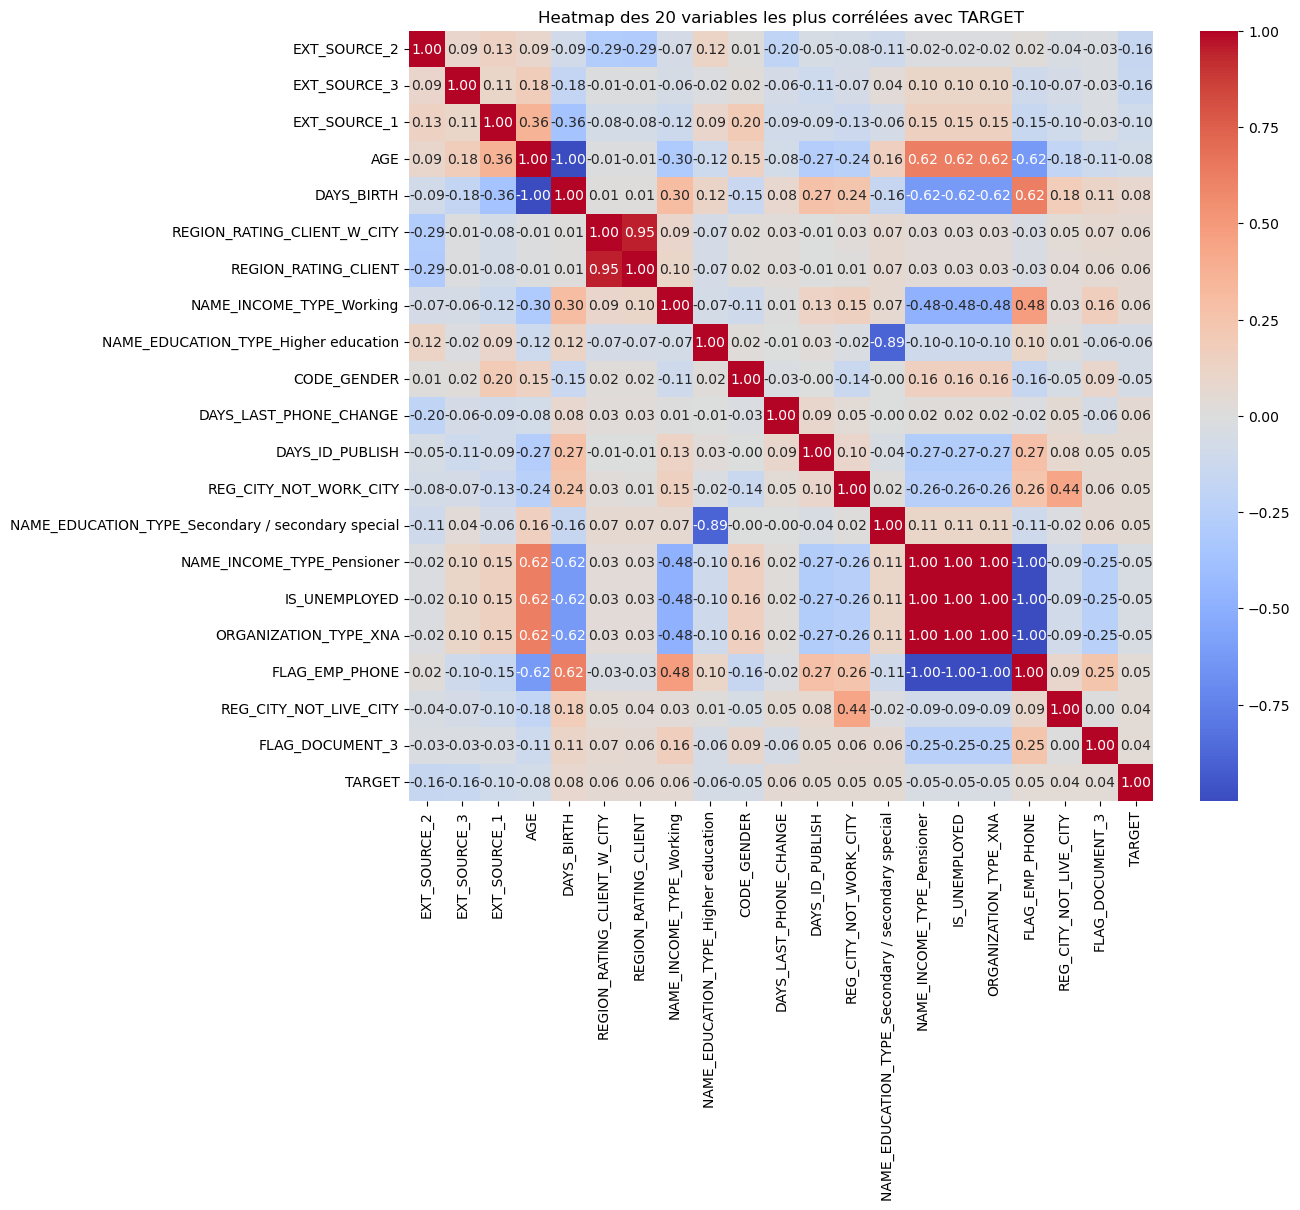

In [109]:
plot_top_correlations(corr_result, app_train_clean, top_n=20)

In [110]:
# Calcul des corrélations entre features et target
target_corr = app_train_clean.corr()['TARGET'].drop('TARGET')

# Affichage des features avec très faible corrélation (par ex < 0.005)
low_corr_features = target_corr[abs(target_corr) < 0.005].index.tolist()

print(f"Nombre de features faiblement corrélées à TARGET (< 0.005) : {len(low_corr_features)}")
print("Features :")
for feature in low_corr_features:
    print("-", feature)


Nombre de features faiblement corrélées à TARGET (< 0.001) : 87
Features :
- SK_ID_CURR
- AMT_INCOME_TOTAL
- FLAG_MOBIL
- FLAG_CONT_MOBILE
- FLAG_EMAIL
- LIVE_REGION_NOT_WORK_REGION
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BEGINEXPLUATATION_MODE
- NONLIVINGAPARTMENTS_MODE
- YEARS_BEGINEXPLUATATION_MEDI
- FLAG_DOCUMENT_4
- FLAG_DOCUMENT_5
- FLAG_DOCUMENT_7
- FLAG_DOCUMENT_9
- FLAG_DOCUMENT_10
- FLAG_DOCUMENT_11
- FLAG_DOCUMENT_12
- FLAG_DOCUMENT_17
- FLAG_DOCUMENT_19
- FLAG_DOCUMENT_20
- FLAG_DOCUMENT_21
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- BURO_AMT_CREDIT_SUM_DEBT_MEAN
- POS_MONTHS_BALANCE_MAX
- INSTAL_PAYMENT_PERC_MEAN
- INSTAL_DPD_MAX
- CC_AMT_PAYMENT_TOTAL_CURRENT_MIN
- CC_SK_DPD_MEAN
- INCOME_CREDIT_PERC
- NAME_TYPE_SUITE_Group of people
- NAME_TYPE_SUITE_Other_A
- NAME_TYPE_SUITE_Other_B
- NAME_TYPE_SUITE_Spouse, partner
- NAME_INCOME_TYPE_Maternity leave
- NAME_INCOME_TYPE_Student
- NAME_EDUCATION_TYPE_Incomplete higher
- NAME_FAMIL

In [116]:
# Applique sur la copie filtrée
app_train_filtered = app_train_clean.drop(columns=low_corr_features)
app_train_filtered.shape

(307507, 200)

### Entre variables

In [118]:
features_only = app_train_filtered.drop(columns=['TARGET'])

# Calcul de la matrice de corrélation absolue
corr_matrix = features_only.corr().abs()

# Affiche la matrice si besoin
print(corr_matrix)

                                                   CODE_GENDER  FLAG_OWN_CAR  \
CODE_GENDER                                           1.000000      0.345848   
FLAG_OWN_CAR                                          0.345848      1.000000   
FLAG_OWN_REALTY                                       0.044374      0.002820   
CNT_CHILDREN                                          0.048038      0.103701   
AMT_CREDIT                                            0.021597      0.116226   
AMT_ANNUITY                                           0.076989      0.141588   
AMT_GOODS_PRICE                                       0.022511      0.120430   
REGION_POPULATION_RELATIVE                            0.014055      0.041313   
DAYS_BIRTH                                            0.148067      0.129883   
DAYS_EMPLOYED                                         0.092562      0.023114   
DAYS_REGISTRATION                                     0.077187      0.087778   
DAYS_ID_PUBLISH                         

In [119]:
def find_highly_correlated_pairs(corr_matrix, threshold=0.8):
    """
    Trouve les paires de variables très corrélées entre elles (> threshold) sans doublons.
    """
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]
                correlated_pairs.append((var1, var2, corr_value))
    
    return correlated_pairs

# Utilisation
correlated_features = find_highly_correlated_pairs(corr_matrix, threshold=0.80)

# Affichage
print(f"Nombre de paires très corrélées (> 0.80) : {len(correlated_features)}\n")
for var1, var2, corr_value in correlated_features:
    print(f"{var1} --- {var2} : corrélation = {corr_value:.3f}")


Nombre de paires très corrélées (> 0.80) : 97

AMT_GOODS_PRICE --- AMT_CREDIT : corrélation = 0.987
CNT_FAM_MEMBERS --- CNT_CHILDREN : corrélation = 0.875
REGION_RATING_CLIENT_W_CITY --- REGION_RATING_CLIENT : corrélation = 0.951
LIVE_CITY_NOT_WORK_CITY --- REG_CITY_NOT_WORK_CITY : corrélation = 0.826
ELEVATORS_AVG --- APARTMENTS_AVG : corrélation = 0.824
LIVINGAREA_AVG --- APARTMENTS_AVG : corrélation = 0.896
LIVINGAREA_AVG --- ELEVATORS_AVG : corrélation = 0.849
APARTMENTS_MODE --- APARTMENTS_AVG : corrélation = 0.974
APARTMENTS_MODE --- LIVINGAREA_AVG : corrélation = 0.874
BASEMENTAREA_MODE --- BASEMENTAREA_AVG : corrélation = 0.974
YEARS_BUILD_MODE --- YEARS_BUILD_AVG : corrélation = 0.989
COMMONAREA_MODE --- COMMONAREA_AVG : corrélation = 0.979
ELEVATORS_MODE --- APARTMENTS_AVG : corrélation = 0.812
ELEVATORS_MODE --- ELEVATORS_AVG : corrélation = 0.982
ELEVATORS_MODE --- LIVINGAREA_AVG : corrélation = 0.836
ELEVATORS_MODE --- APARTMENTS_MODE : corrélation = 0.815
ENTRANCES_MODE -

Ici le tri est effectué en gardant en tête les corrélations trop fortes mais c'est le sens métier qui primer. Par exemple, garde quand même CNT_FAM_MEMBERS et CNT_CHILDREN, AMT_GOODS_PRICE et AMT_CREDIT etc. Toutes les variables qui traitent des spécificités de l'habitat sont supprimées (entrance, elevators etc.)

In [128]:
# Variables à supprimer
vars_to_drop_corr = [
    'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'FLOORSMIN_AVG', 
    'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE','NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 
    'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 
    'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 
    'BURO_BB_MONTHS_BALANCE_SIZE_MEAN','PREV_AMT_APPLICATION_MAX', 
    'ORGANIZATION_TYPE_XNA', 'WALLSMATERIAL_MODE_Unknown', 'EMERGENCYSTATE_MODE_Unknown'
]

# Nouveau dataframe
app_train_filtered_2 = app_train_filtered.drop(columns=vars_to_drop_corr)


In [130]:
# Sélectionner toutes les colonnes d'intérêt
colonnes_categorisees = [
    col for col in app_train_filtered_2.columns 
    if col.startswith('NAME_TYPE_SUITE_') or 
       col.startswith('NAME_INCOME_TYPE_') or 
       col.startswith('NAME_EDUCATION_TYPE_') or 
       col.startswith('NAME_FAMILY_STATUS_') or 
       col.startswith('NAME_HOUSING_TYPE_') or 
       col.startswith('OCCUPATION_TYPE_') or
       col.startswith('NAME_CONTRACT_TYPE_') or
       col.startswith('NAME_INCOME_TYPE_') or
       col.startswith('ORGANIZATION_TYPE_')
]

# Calcul de la distribution
distribution = app_train_filtered_2[colonnes_categorisees].sum().sort_values(ascending=False)

# Affichage
print(distribution)


NAME_HOUSING_TYPE_House / apartment                  272865
NAME_TYPE_SUITE_Unaccompanied                        248523
NAME_EDUCATION_TYPE_Secondary / secondary special    218389
NAME_FAMILY_STATUS_Married                           196429
NAME_INCOME_TYPE_Working                             158771
OCCUPATION_TYPE_Unknown                               96389
NAME_EDUCATION_TYPE_Higher education                  74862
NAME_INCOME_TYPE_Commercial associate                 71616
ORGANIZATION_TYPE_Business Entity Type 3              67992
NAME_INCOME_TYPE_Pensioner                            55362
OCCUPATION_TYPE_Laborers                              55186
NAME_FAMILY_STATUS_Single / not married               45444
NAME_TYPE_SUITE_Family                                40148
ORGANIZATION_TYPE_Self-employed                       38412
OCCUPATION_TYPE_Sales staff                           32102
NAME_CONTRACT_TYPE_Revolving loans                    29275
OCCUPATION_TYPE_Core staff              

In [136]:
display(app_train_filtered_2.columns.tolist())

['TARGET',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BUILD_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BUILD_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLA

In [140]:
# Liste des variables à supprimer selon l'analyse métier
variables_a_supprimer = [
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_PHONE', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
    'LANDAREA_AVG', 'LIVINGAREA_AVG', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAPARTMENTS_AVG',
    'FLOORSMAX_MODE', 'YEARS_BUILD_MEDI', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16','FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'NAME_TYPE_SUITE_Family',  'NAME_TYPE_SUITE_Unaccompanied', 
    'NAME_TYPE_SUITE_Unknown', 'NAME_TYPE_SUITE_nan', 'NAME_INCOME_TYPE_nan', 
    'NAME_EDUCATION_TYPE_nan', 'NAME_FAMILY_STATUS_nan', 'NAME_HOUSING_TYPE_nan',
    'OCCUPATION_TYPE_nan', 'ORGANIZATION_TYPE_nan', 'NAME_CONTRACT_TYPE_nan',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'WEEKDAY_APPR_PROCESS_START_MONDAY', 'FONDKAPREMONT_MODE_org spec account',
    'FONDKAPREMONT_MODE_reg oper account', 'FONDKAPREMONT_MODE_reg oper spec account', 'FONDKAPREMONT_MODE_nan',
    'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_nan', 
    'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden', 'HOUSETYPE_MODE_block of flats', 
    'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_nan','EMERGENCYSTATE_MODE_nan'
]

# Suppression des variables de la liste dans le DataFrame
app_train_filtered_3 = app_train_filtered_2.drop(columns=variables_a_supprimer)



## **Filtre et regroupement de variables**

In [157]:
# 1. Repérer toutes les colonnes 'Organization_Type'
org_cols = [col for col in app_train_filtered_3.columns if col.startswith('ORGANIZATION_TYPE_')]

# 2. DataFrame temporaire juste avec ces colonnes
df_org = app_train_filtered_3[org_cols]

# 3. Créer un dictionnaire vide pour les groupes
groupes = {}

# 4. Définir les groupes principaux
groupes['SECTOR_Industry'] = [col for col in df_org.columns if 'Industry' in col]
groupes['SECTOR_Trade'] = [col for col in df_org.columns if 'Trade' in col]
groupes['SECTOR_Transport'] = [col for col in df_org.columns if 'Transport' in col]
groupes['SECTOR_Business Entity'] = [col for col in df_org.columns if 'Business Entity' in col]
groupes['SECTOR_Government'] = [col for col in df_org.columns if 'Government' in col]
groupes['SECTOR_Security'] = [col for col in df_org.columns if 'Security' in col]

# 5. Ajouter manuellement certains groupes spécifiques
groupes['SECTOR_Services'] = ['ORGANIZATION_TYPE_School','ORGANIZATION_TYPE_Kindergarten','ORGANIZATION_TYPE_Restaurant']
groupes['SECTOR_Construction'] = ['ORGANIZATION_TYPE_Construction']
groupes['SECTOR_Medicine'] = ['ORGANIZATION_TYPE_Medicine']
groupes['SECTOR_Police'] = ['ORGANIZATION_TYPE_Police']

# 6. Définir les colonnes restantes dans un groupe 'Other'
# -> On prend toutes les colonnes de df_org qui ne sont dans aucun groupe encore
cols_deja_groupées = sum(groupes.values(), [])  # Liste de toutes les colonnes déjà assignées
groupes['SECTOR_Other'] = [col for col in df_org.columns if col not in cols_deja_groupées]

# 7. Créer les nouvelles colonnes dans le df principal
app_train_filtered_3 = app_train_filtered_3.copy() 
for group_name, columns in groupes.items():
    # Pour chaque observation : 1 si au moins une colonne du groupe vaut 1, sinon 0
    app_train_filtered_3[group_name] = df_org[columns].max(axis=1)

# 8. Supprimer les anciennes colonnes 'Organization_Type'
app_train_filtered_3 = app_train_filtered_3.drop(columns=org_cols)

# 9. Vérification : afficher le nombre d'observations par nouveau groupe
print("Distribution des nouveaux groupes :")
print(app_train_filtered_3[[col for col in groupes.keys()]].sum())


Distribution des nouveaux groupes :
SECTOR_Industry            8053
SECTOR_Trade              11954
SECTOR_Transport           6585
SECTOR_Business Entity    67992
SECTOR_Government         10404
SECTOR_Security            5221
SECTOR_Services           17583
SECTOR_Construction        6721
SECTOR_Medicine           11192
SECTOR_Police              2341
SECTOR_Other              47334
dtype: int64


In [173]:
# 1. Identifier les colonnes OCCUPATION_TYPE
occupation_cols = [col for col in app_train_filtered_3.columns if col.startswith('OCCUPATION_TYPE_')]

# 2. Créer un DataFrame temporaire
df_occ = app_train_filtered_3[occupation_cols]

# 3. Définir les regroupements en 8 grands groupes
occupation_groupes = {
    'OCCUPATION_Labor_Work': [
        'OCCUPATION_TYPE_Laborers', 
        'OCCUPATION_TYPE_Low-skill Laborers', 
        'OCCUPATION_TYPE_Drivers'
    ],

    'OCCUPATION_Sales_Services': [
        'OCCUPATION_TYPE_Sales staff', 
        'OCCUPATION_TYPE_Waiters/barmen staff', 
        'OCCUPATION_TYPE_Private service staff'
    ],
    'OCCUPATION_Medical_Staff': [
        'OCCUPATION_TYPE_Medicine staff'
    ],
    'OCCUPATION_Security': [
        'OCCUPATION_TYPE_Security staff'
    ],
    'OCCUPATION_Management_Core': [
        'OCCUPATION_TYPE_Managers', 
        'OCCUPATION_TYPE_Core staff'
    ],
    'OCCUPATION_Other': [
        'OCCUPATION_TYPE_Cleaning staff', 
        'OCCUPATION_TYPE_Cooking staff', 
        'OCCUPATION_TYPE_Unknown'
    ]
}

# 4. Création des nouvelles colonnes
for group_name, columns in occupation_groupes.items():
    # max(axis=1) permet de dire : si une des anciennes catégories vaut 1, alors mettre 1 dans la nouvelle colonne
    app_train_filtered_3[group_name] = df_occ[columns].max(axis=1)

# 5.  Supprimer les anciennes colonnes one-hot d'occupation
app_train_filtered_3 = app_train_filtered_3.drop(columns=occupation_cols)

# 6. Vérification : afficher le nombre d'observations par nouveau groupe
print("Distribution des nouveaux groupes d'occupation :")
print(app_train_filtered_3[[col for col in occupation_groupes.keys()]].sum())

display(app_train_filtered_3.columns.tolist())

KeyError: "None of [Index(['OCCUPATION_TYPE_Sales staff', 'OCCUPATION_TYPE_Waiters/barmen staff',\n       'OCCUPATION_TYPE_Private service staff'],\n      dtype='object')] are in the [columns]"

In [179]:
display(app_train_filtered_3.columns)

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BUILD_AVG', 'TOTALAREA_MODE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'IS_UNEMPLOYED', 'BURO_DAYS_CREDIT_MIN',
       'BURO_DAYS_CREDIT_MAX', 'BURO_DAYS_CREDIT_MEAN',
       'BURO_AMT_CREDIT_SUM_MEAN', 'BURO_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BURO_CREDIT_DAY_OVERDUE_MEAN', 'PREV_AMT_CREDIT_MEAN',
       'PREV_AMT_CREDIT_MAX', 'PREV_AMT_APPLICATION_MEAN',
       'PREV_APP_CREDIT_PERC_MEAN', 'PREV_DAYS_DECISION_MIN',
       'PREV_CNT_PAYMENT_MEAN', 'POS_SK_DPD_MEAN', 'POS_SK_DPD_DEF_MEAN',
       'INSTAL_PAYMENT_DIFF_MEAN', 'INSTAL_PAYMENT_DIFF_MAX',
       'INSTAL_DPD_MEAN', 'CC_AMT_BALANCE_MEAN', 'CC_AMT_BALANCE_MAX',
       'CC_AMT_BALANCE_MIN', 'CC_AMT_PAYMENT_TOTAL_CURRENT

In [ ]:



a garder: REGION_RATING_CLIENT_W_CITY

In [187]:
# 5.  Supprimer les anciennes colonnes one-hot d'occupation
drop_columns = ['BURO_DAYS_CREDIT_MIN','BURO_DAYS_CREDIT_MAX', 'REGION_POPULATION_RELATIVE', 
                'PREV_AMT_CREDIT_MEAN', 'PREV_AMT_APPLICATION_MEAN','INSTAL_PAYMENT_DIFF_MAX', 
                'CC_AMT_BALANCE_MAX','CC_AMT_BALANCE_MIN', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
                'WEEKDAY_APPR_PROCESS_START_nan','CC_AMT_PAYMENT_TOTAL_CURRENT_MAX']

app_train_filtered_3 = app_train_filtered_3.drop(columns=drop_columns)


KeyError: "['BURO_DAYS_CREDIT_MIN', 'BURO_DAYS_CREDIT_MAX', 'REGION_POPULATION_RELATIVE', 'PREV_AMT_CREDIT_MEAN', 'PREV_AMT_APPLICATION_MEAN', 'INSTAL_PAYMENT_DIFF_MAX', 'CC_AMT_BALANCE_MAX', 'CC_AMT_BALANCE_MIN', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN', 'WEEKDAY_APPR_PROCESS_START_nan', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MAX'] not found in axis"

In [189]:
display(app_train_filtered_3.shape)

(307507, 72)

## **Automatisation du filtrage des colonnes**

In [62]:

# -------------------------------------------------------------------------------------------------
# --- Fonctions utilitaires pour le nettoyage des données ---------------------------------------
# -------------------------------------------------------------------------------------------------

def correlation_with_target(df, target_col='TARGET', normality_alpha=0.05):
    """
    Fonction pour calculer la corrélation des variables numériques avec la variable cible ('TARGET').
    Si la distribution de la variable est normale, on utilise Pearson, sinon Spearman.
    """
    results = []
    numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.drop(target_col, errors='ignore')

    for col in numerical_cols:
        x = df[col].astype(float)
        y = df[target_col]

        if x.nunique() <= 1:
            continue

        stat, p = normaltest(x.dropna())
        is_normal = p > normality_alpha

        try:
            if is_normal:
                corr, _ = pearsonr(x.dropna(), y.loc[x.dropna().index])
            else:
                corr, _ = spearmanr(x.dropna(), y.loc[x.dropna().index])
        except Exception:
            corr = np.nan

        results.append({'variable': col, 'correlation': corr})

    corr_df = pd.DataFrame(results)
    corr_df['abs_corr'] = corr_df['correlation'].abs()

    return corr_df.sort_values(by='abs_corr', ascending=False)

def regroup_organization_types(df):
    """
    Regroupe les variables relatives à 'ORGANIZATION_TYPE' en catégories plus larges pour une meilleure interprétation.
    """
    org_cols = [col for col in df.columns if col.startswith('ORGANIZATION_TYPE_')]
    groupes = {
        'SECTOR_Industry': [col for col in org_cols if 'Industry' in col],
        'SECTOR_Trade': [col for col in org_cols if 'Trade' in col],
        'SECTOR_Transport': [col for col in org_cols if 'Transport' in col],
        'SECTOR_Business Entity': [col for col in org_cols if 'Business Entity' in col],
        'SECTOR_Government': [col for col in org_cols if 'Government' in col],
        'SECTOR_Security': [col for col in org_cols if 'Security' in col],
        'SECTOR_Services': ['ORGANIZATION_TYPE_School', 'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Restaurant'],
        'SECTOR_Construction': ['ORGANIZATION_TYPE_Construction'],
        'SECTOR_Medicine': ['ORGANIZATION_TYPE_Medicine'],
        'SECTOR_Police': ['ORGANIZATION_TYPE_Police'],
    }
    cols_deja_groupées = sum(groupes.values(), [])
    groupes['SECTOR_Other'] = [col for col in org_cols if col not in cols_deja_groupées]

    for group_name, columns in groupes.items():
        df[group_name] = df[columns].max(axis=1)

    return df.drop(columns=org_cols)

def regroup_occupation_types(df):
    """
    Regroupe les variables relatives à 'OCCUPATION_TYPE' en catégories plus larges pour une meilleure interprétation.
    """
    occupation_cols = [col for col in df.columns if col.startswith('OCCUPATION_TYPE_')]
    groupes = {
    'OCCUPATION_Labor_Work': ['OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Drivers'],
    'OCCUPATION_Sales_Services': ['OCCUPATION_TYPE_Sales staff', 'OCCUPATION_TYPE_Waiters/barmen staff','OCCUPATION_TYPE_Private service staff'],
    'OCCUPATION_Medical_Staff': ['OCCUPATION_TYPE_Medicine staff'],
    'OCCUPATION_Security': ['OCCUPATION_TYPE_Security staff'],
    'OCCUPATION_Management_Core': ['OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Core staff'],
    'OCCUPATION_Other': ['OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Unknown']}

    for group_name, columns in groupes.items():
        df[group_name] = df[columns].max(axis=1)

    return df.drop(columns=occupation_cols)

# -------------------------------------------------------------------------------------------------
# --- Nettoyage des données (train et test) ------------------------------------------------------
# -------------------------------------------------------------------------------------------------

def clean_dataset(df, target_col='TARGET', target_present=True):
    """
    Cette fonction effectue le nettoyage des données en supprimant les colonnes peu pertinentes, 
    en regroupant certaines variables et en vérifiant la cohérence des données.
    """
    
    df_clean = df.copy()
    
    # Si le DataFrame contient la cible, on la retire pour le nettoyage
    if target_present and target_col in df_clean.columns:
        target_values = df_clean[target_col]
        df_clean = df_clean.drop(columns=[target_col])
        

    # 1. Suppression des colonnes très peu corrélées avec la target
    low_corr_vars = [
    'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION',
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'NONLIVINGAPARTMENTS_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'BURO_AMT_CREDIT_SUM_DEBT_MEAN', 'POS_MONTHS_BALANCE_MAX', 'INSTAL_PAYMENT_PERC_MEAN',
    'INSTAL_DPD_MAX', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MIN', 'CC_SK_DPD_MEAN', 'INCOME_CREDIT_PERC',
    'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
    'NAME_TYPE_SUITE_Spouse, partner', 'NAME_INCOME_TYPE_Maternity leave',
    'NAME_INCOME_TYPE_Student', 'NAME_EDUCATION_TYPE_Incomplete higher',
    'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Unknown',
    'NAME_HOUSING_TYPE_Municipal apartment', 'OCCUPATION_TYPE_HR staff',
    'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Secretaries',
    'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
    'WEEKDAY_APPR_PROCESS_START_THURSDAY', 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
    'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'ORGANIZATION_TYPE_Business Entity Type 1',
    'ORGANIZATION_TYPE_Business Entity Type 2', 'ORGANIZATION_TYPE_Cleaning',
    'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Emergency',
    'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Industry: type 10',
    'ORGANIZATION_TYPE_Industry: type 11', 'ORGANIZATION_TYPE_Industry: type 13',
    'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Industry: type 4',
    'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Industry: type 6',
    'ORGANIZATION_TYPE_Industry: type 7', 'ORGANIZATION_TYPE_Industry: type 8',
    'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Mobile',
    'ORGANIZATION_TYPE_Other', 'ORGANIZATION_TYPE_Postal', 'ORGANIZATION_TYPE_Realtor',
    'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Telecom',
    'ORGANIZATION_TYPE_Trade: type 1', 'ORGANIZATION_TYPE_Trade: type 2',
    'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
    'ORGANIZATION_TYPE_Transport: type 1', 'ORGANIZATION_TYPE_Transport: type 2',
    'FONDKAPREMONT_MODE_not specified', 'HOUSETYPE_MODE_terraced house',
    'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Others', 'EMERGENCYSTATE_MODE_Yes'
]

    
    df_clean = df_clean.drop(columns=[col for col in low_corr_vars if col in df_clean.columns])

    # 2. Suppression des variables très corrélées entre elles et peu pertinentes pour le scoring
    highly_corr_vars = [
    'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION', 
    'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
    'YEARS_BUILD_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ENTRANCES_AVG', 
    'ENTRANCES_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 
    'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'FLOORSMAX_MODE',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
    'BURO_BB_MONTHS_BALANCE_SIZE_MEAN', 'PREV_AMT_APPLICATION_MAX',
    'ORGANIZATION_TYPE_XNA', 'WALLSMATERIAL_MODE_Unknown', 'EMERGENCYSTATE_MODE_Unknown',
    'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 
    'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Unknown', 'NAME_TYPE_SUITE_nan',
    'NAME_INCOME_TYPE_nan', 'NAME_EDUCATION_TYPE_nan', 'NAME_FAMILY_STATUS_nan', 'NAME_HOUSING_TYPE_nan', 'OCCUPATION_TYPE_nan', 
    'ORGANIZATION_TYPE_nan', 'NAME_CONTRACT_TYPE_nan',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'WEEKDAY_APPR_PROCESS_START_MONDAY', 'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'WEEKDAY_APPR_PROCESS_START_SUNDAY', 
    'WEEKDAY_APPR_PROCESS_START_TUESDAY', 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
    'FONDKAPREMONT_MODE_org spec account', 'FONDKAPREMONT_MODE_reg oper account', 
    'FONDKAPREMONT_MODE_reg oper spec account', 'FONDKAPREMONT_MODE_nan',
    'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_nan', 'WALLSMATERIAL_MODE_Panel', 
    'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden', 'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_specific housing', 
    'HOUSETYPE_MODE_nan', 'EMERGENCYSTATE_MODE_nan','DAYS_BIRTH','DAYS_EMPLOYED', 'BURO_DAYS_CREDIT_MIN','BURO_DAYS_CREDIT_MAX',
    'PREV_AMT_CREDIT_MEAN','PREV_AMT_CREDIT_MEAN', 'PREV_CNT_PAYMENT_MEAN','CC_AMT_BALANCE_MAX','CC_AMT_BALANCE_MIN',
    'CC_AMT_PAYMENT_TOTAL_CURRENT_MAX','WEEKDAY_APPR_PROCESS_START_nan',
]

    
    df_clean = df_clean.drop(columns=[col for col in highly_corr_vars if col in df_clean.columns])

    # 3. Regroupement Organization
    df_clean = regroup_organization_types(df_clean)

    # 4. Regroupement Occupation
    df_clean = regroup_occupation_types(df_clean)
    
    # Si la cible a été retirée au début, on la réajoute ici
    if target_present and target_col:
        df_clean[target_col] = target_values

    return df_clean


# -------------------------------------------------------------------------------------------------
# --- Application sur les DataFrames d'entrainement et de test -----------------------------------
# -------------------------------------------------------------------------------------------------

# Nettoyage de app_train_clean (avec la target)
app_train_filtered_final = clean_dataset(app_train_clean, target_col='TARGET', target_present=True)

# Nettoyage de app_test_clean (sans la target, donc la colonne 'TARGET' est ignorée ici)
app_test_filtered_final = clean_dataset(app_test_clean, target_col='TARGET', target_present=False)


# -------------------------------------------------------------------------------------------------
# --- Vérifications de cohérence des variables -----------------------------------------------------
# -------------------------------------------------------------------------------------------------

# Vérification des variables explicatives communes dans les deux datasets
train_columns = set(app_train_filtered_final.columns)
test_columns = set(app_test_filtered_final.columns)

# La target est présente dans app_train, mais pas dans app_test
train_columns.discard('TARGET')

# Vérification que les variables explicatives sont identiques
common_columns = train_columns & test_columns
missing_in_test = train_columns - common_columns
missing_in_train = test_columns - common_columns

# Affichage des résultats
print(f"Nombre de variables communes : {len(common_columns)}")
print(f"Variables manquantes dans app_test : {len(missing_in_test)}")
print(f"Variables manquantes dans app_train : {len(missing_in_train)}")

# Liste des variables manquantes dans app_test
print(f"Variables manquantes dans app_test : {list(missing_in_test)}")

# S'assurer que les variables explicatives sont exactement les mêmes, à l'exception de 'TARGET'
if not missing_in_test and not missing_in_train:
    print("Les variables explicatives sont identiques dans les deux jeux de données.")
else:
    print("Attention, des différences ont été détectées dans les variables explicatives.")


Nombre de variables communes : 74
Variables manquantes dans app_test : 0
Variables manquantes dans app_train : 0
Variables manquantes dans app_test : []
Les variables explicatives sont identiques dans les deux jeux de données.


In [63]:
display(app_train_filtered_final.shape)
display(app_test_filtered_final.shape)

(307507, 75)

(48744, 74)

In [64]:
# Vérification de l'alignement des index entre train et test
if not app_train_filtered_final.index.equals(app_test_filtered_final.index):
    print("Attention: Les index de train et test ne sont pas alignés.")
    # Optionnel: réinitialiser les index si nécessaire
    app_train_filtered_final.reset_index(drop=True, inplace=True)
    app_test_filtered_final.reset_index(drop=True, inplace=True)
else:
    print("Les index de train et test sont alignés.")

# Vérification des dimensions finales
print(f"Dimensions finales de app_train_filtered_final : {app_train_filtered_final.shape}")
print(f"Dimensions finales de app_test_filtered_final : {app_test_filtered_final.shape}")

# Vérification de l'intégrité des index
print(f"Premier index de app_train_filtered_final : {app_train_filtered_final.index[0]}")
print(f"Premier index de app_test_filtered_final : {app_test_filtered_final.index[0]}")

# Vérification que l'index est bien continu dans les deux datasets
print(f"Index train est-il continu ? {app_train_filtered_final.index.is_monotonic_increasing}")
print(f"Index test est-il continu ? {app_test_filtered_final.index.is_monotonic_increasing}")


Attention: Les index de train et test ne sont pas alignés.
Dimensions finales de app_train_filtered_final : (307507, 75)
Dimensions finales de app_test_filtered_final : (48744, 74)
Premier index de app_train_filtered_final : 0
Premier index de app_test_filtered_final : 0
Index train est-il continu ? True
Index test est-il continu ? True


In [65]:
display(app_train_filtered_final.columns.tolist())

['SK_ID_CURR',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BUILD_AVG',
 'TOTALAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'IS_UNEMPLOYED',
 'BURO_DAYS_CREDIT_MEAN',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'BURO_CREDIT_DAY_OVERDUE_MEAN',
 'PREV_AMT_CREDIT_MAX',
 'PREV_AMT_APPLICATION_MEAN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'PREV_DAYS_DECISION_MIN',
 'POS_SK_DPD_MEAN',
 'POS_SK_DPD_DEF_MEAN',
 'INSTAL_PAYMENT_DIFF_MEAN',
 'INSTAL_PAYMENT_DIFF_MAX',
 'INSTAL_DPD_MEAN',
 'CC_AMT_BALANCE_MEAN',
 'CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
 'CC_SK_DPD_MAX',
 'DAYS_EMPLOYED_PERC',
 'INCOME_PER_PERSON',
 'ANNUITY_INCOME_PERC',
 'PAYMENT_RATE',
 'CREDIT_TERM',
 'AGE',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_INCOME_TYPE_Commercial associa

In [66]:
display(app_test_filtered_final.columns.tolist())

['SK_ID_CURR',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BUILD_AVG',
 'TOTALAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'IS_UNEMPLOYED',
 'BURO_DAYS_CREDIT_MEAN',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'BURO_CREDIT_DAY_OVERDUE_MEAN',
 'PREV_AMT_CREDIT_MAX',
 'PREV_AMT_APPLICATION_MEAN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'PREV_DAYS_DECISION_MIN',
 'POS_SK_DPD_MEAN',
 'POS_SK_DPD_DEF_MEAN',
 'INSTAL_PAYMENT_DIFF_MEAN',
 'INSTAL_PAYMENT_DIFF_MAX',
 'INSTAL_DPD_MEAN',
 'CC_AMT_BALANCE_MEAN',
 'CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
 'CC_SK_DPD_MAX',
 'DAYS_EMPLOYED_PERC',
 'INCOME_PER_PERSON',
 'ANNUITY_INCOME_PERC',
 'PAYMENT_RATE',
 'CREDIT_TERM',
 'AGE',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_INCOME_TYPE_Commercial associa

In [67]:
app_train_filtered_final.to_csv('app_train_filtered_final.csv', index=False)

In [68]:
app_test_filtered_final.to_csv('app_test_filtered_final.csv', index=False)